<a href="https://colab.research.google.com/github/BoWarburton/DS-Unit-2-Applied-Modeling/blob/master/Bo_Warburton_LS_DS_235_Sprint_Challenge_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_

# Applied Modeling Sprint Challenge: Predict Chicago food inspections 🍕

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to install packages in Colab:

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:

- Confusion Matrix
- Permutation Importances
- Partial Dependence Plot, 1 feature isolation
- Partial Dependence Plot, 2 features interaction
- Shapley Values

_To earn a score of 3 for this part, make four of these visualization types._

# Part 1: Preprocessing

> You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

In [98]:
train.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Fail
count,5.191600e+04,5.191100e+04,51890.000000,51718.000000,51718.000000,51916.000000
mean,1.330265e+06,1.549491e+06,60628.834669,41.879568,-87.676663,0.258610
std,6.202664e+05,9.018283e+05,22.736963,0.081126,0.059509,0.437875
min,4.425000e+04,0.000000e+00,60007.000000,41.644670,-87.914428,0.000000
25%,6.796205e+05,1.140745e+06,60614.000000,41.830296,-87.707857,0.000000
50%,1.424226e+06,1.958619e+06,60625.000000,41.890166,-87.666524,0.000000
75%,1.946952e+06,2.215507e+06,60643.000000,41.939167,-87.634461,1.000000
max,2.279709e+06,8.700606e+06,60827.000000,42.021064,-87.525094,1.000000


In [99]:
test.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Fail
count,1.730600e+04,1.730400e+04,17298.000000,17245.000000,17245.000000,17306.000000
mean,1.323403e+06,1.562543e+06,60628.920338,41.879518,-87.676646,0.258581
std,6.240521e+05,8.947393e+05,23.462366,0.080895,0.059617,0.437867
min,4.426100e+04,0.000000e+00,60007.000000,41.644670,-87.914428,0.000000
25%,6.709562e+05,1.145506e+06,60614.000000,41.830619,-87.708016,0.000000
50%,1.418794e+06,1.964748e+06,60625.000000,41.890300,-87.666898,0.000000
75%,1.946488e+06,2.208688e+06,60643.000000,41.938989,-87.634501,1.000000
max,2.279564e+06,3.759896e+06,60827.000000,42.021064,-87.525872,1.000000


In [100]:
train.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Fail                 int64
dtype: object

In [101]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [102]:
train.shape, test.shape

((51916, 17), (17306, 17))

In [103]:
# No obvious need to drop columns
# But put column names in lower case and remove spaces
train.columns = map(str.lower, train.columns)
train.head()

,inspection id,dba name,aka name,license #,facility type,risk,address,city,state,zip,inspection date,inspection type,violations,latitude,longitude,location,fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [104]:
test.columns = map(str.lower, test.columns)
test.dtypes

inspection id        int64
dba name            object
aka name            object
license #          float64
facility type       object
risk                object
address             object
city                object
state               object
zip                float64
inspection date     object
inspection type     object
violations          object
latitude           float64
longitude          float64
location            object
fail                 int64
dtype: object

In [105]:
train = train.rename(columns = {'inspection id':'inspection_id',
                          'dba name':'dba',
                          'aka name':'aka',
                          'license #':'license',
                          'facility type':'facility',
                          'inspection date':'inspection_date',
                          'inspection type':'inspection_type',
                          })
train.dtypes

inspection_id        int64
dba                 object
aka                 object
license            float64
facility            object
risk                object
address             object
city                object
state               object
zip                float64
inspection_date     object
inspection_type     object
violations          object
latitude           float64
longitude          float64
location            object
fail                 int64
dtype: object

In [106]:
test = test.rename(columns = {'inspection id':'inspection_id',
                          'dba name':'dba',
                          'aka name':'aka',
                          'license #':'license',
                          'facility type':'facility',
                          'inspection date':'inspection_date',
                          'inspection type':'inspection_type',
                          })
test.dtypes

inspection_id        int64
dba                 object
aka                 object
license            float64
facility            object
risk                object
address             object
city                object
state               object
zip                float64
inspection_date     object
inspection_type     object
violations          object
latitude           float64
longitude          float64
location            object
fail                 int64
dtype: object

In [107]:
# Look at some value counts
train['inspection_type'].value_counts()

Canvass                                   24170
License                                    7825
Canvass Re-Inspection                      6346
Complaint                                  4948
License Re-Inspection                      3002
Complaint Re-Inspection                    2241
Short Form Complaint                       2103
License-Task Force                          214
Suspected Food Poisoning                    207
Consultation                                189
Tag Removal                                 146
Out of Business                             109
Task Force Liquor 1475                       92
Recent Inspection                            66
Suspected Food Poisoning Re-inspection       58
Complaint-Fire                               51
Short Form Fire-Complaint                    36
No Entry                                     21
Special Events (Festivals)                   21
Package Liquor 1474                          16
Complaint-Fire Re-inspection            

In [108]:
train.isnull().sum()

inspection_id         0
dba                   0
aka                 623
license               5
facility            224
risk                 12
address               0
city                 53
state                10
zip                  26
inspection_date       0
inspection_type       1
violations         9655
latitude            198
longitude           198
location            198
fail                  0
dtype: int64

In [109]:
train.violations.value_counts()

38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQUIRED: PLUMBING: INSTALLED AND MAINTAINED - Comments: Ventilation: All plumbing fixtures, such as toilets, sinks, washbasins, etc., must be adequately trapped, vented, and re-vented and properly connected to the sewer in accordance with the plumbing chapter of the Municipal Code of Chicago and the Rules and Regulations of the Board of Health.    Found 3 compartment sink at front preparation areas with no grease trap. Found pizza oven and pannini grill not hooded/vented.    3
45. FOOD HANDLER REQUIREMENTS MET - Comments: ALL FOOD HANDLING EMPLOYEES MUST SHOW PROOF OF FOOD HANDLER TRAINING.  MUST PROVIDE.                                                                                                                                                                                                                                                                                                                                                    

In [0]:
# Guess as to the feature with leakage: probably if the violations feature is not null, it's a fail

In [113]:
# What's the baseline?
target = 'fail'
train[target].mean()

0.25861006240850604

In [25]:
# Pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(train).to_notebook_iframe()
profile

In [0]:
# Based on an initial look, start with categorical features inspection_type and risk
# and numeric features zip and longitude
features = ['inspection_type', 'risk', 'zip', 'longitude']

# Part 2: Modeling

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._

> **Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.
>
> Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

In [116]:
# Three-way split
from sklearn.model_selection import train_test_split
train, val = train_test_split(train,
                              train_size=0.80,
                              test_size=0.20,
                              random_state=42)

train.shape, test.shape, val.shape

((33225, 17), (17306, 17), (8307, 17))

In [117]:
# Arrange X features and y target

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

X_train.shape, y_train.shape

((33225, 4), (33225,))

## Random Forest Classifer
This is a classification problem

In [0]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=999, n_jobs=-1, random_state=37)
    )

In [120]:
# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
print(f'Estimated ROC AUC validation score: {accuracy_score(y_val, y_pred)*100:.2f}%')

Estimated ROC AUC validation score: 69.84%


In [121]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_test)[:, -1]
print(f'Test ROC AUC score: {roc_auc_score(y_test, y_pred_proba)*100:.2f}%')

Test ROC AUC score: 63.49%


# Part 3: Visualization

> Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:
>
> - Permutation Importances
> - Partial Dependence Plot, 1 feature isolation
> - Partial Dependence Plot, 2 features interaction
> - Shapley Values

Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:

- Confusion Matrix
- Permutation Importances
- Partial Dependence Plot, 1 feature isolation
- Partial Dependence Plot, 2 features interaction
- Shapley Values

_To earn a score of 3 for this part, make four of these visualization types._

## Confusion Matrix

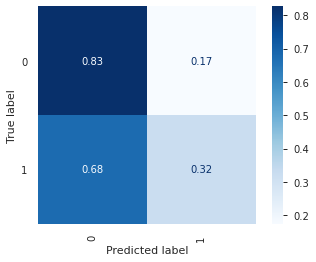

In [122]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='vertical',
                      normalize='true', 
                      values_format='.2f',
                      cmap='Blues');

## Permutation Importances

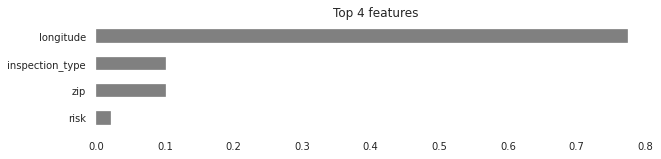

In [123]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 4
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [63]:
# Data transformation

transformers = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer()
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [65]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
#    scoring='accuracy',
#    n_iter=5,
#    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [66]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)
eli5.show_weights(permuter,
                  top=None,
                  feature_names=feature_names)

Weight,Feature
0.0518 ± 0.0068,inspection_type
0.0115 ± 0.0063,longitude
0.0087 ± 0.0031,risk
0.0086 ± 0.0089,zip
